In [1]:
import matplotlib.pyplot as plt           # for plots
from matplotlib.figure import Figure
from mpl_toolkits.mplot3d import Axes3D   # for 3D plots
import numpy as np                       # scientific computing tools
from matplotlib.colors import LightSource

In [108]:
#
zc = 0
z_order_sphere     = 0
z_order_surface    = 200
z_order_axes       = 100

# Parameters for the 3D view
elevation__   = -10
azimuth__     = 20
dist__        = 10
delta_zo_back = 50

# 2D to 3D coordinates
def coord3d(theta, phi, epsilon):
    v = -theta
    u = phi
    coefs = (1., 1., epsilon)                   # Coefficients in (x/a)**2 + (y/b)**2 + (z/c)**2 = 1 
    rx, ry, rz = coefs                          # Radii corresponding to the coefficients
    x = rx * np.multiply(np.cos(u), np.cos(v))
    y = ry * np.multiply(np.cos(u), np.sin(v))
    z = rz * np.sin(u)
    return x, y, z

def get_cam(elev, azimuth, dist):
    ce   = np.cos(2*np.pi*elev/360)
    se   = np.sin(2*np.pi*elev/360)
    ca   = np.cos(2*np.pi*azimuth/360)
    sa   = np.sin(2*np.pi*azimuth/360)
    cam  = np.array([ dist*ca*ce, dist*sa*ce, dist*se])
    return cam

def plot3d(ax, x, y, z, elevation, azimuth, color, linewidth, linestyle='solid', zorder=1):
    N = len(x)
    i = 0
    j = 1
    cam = get_cam(elevation, azimuth, dist__)
    ps = x[0]*cam[0]+y[0]*cam[1]+z[0]*cam[2]
    while i<N-1:
        ps_j = x[j]*cam[0]+y[j]*cam[1]+z[j]*cam[2]
        if (ps*ps_j<0) or (j==N-1):
            if ps>0:
                ls = linestyle
                lw = linewidth/2.0
                al = 0.5
                zo = -zorder
            else:
                ls = linestyle
                lw = linewidth
                al = 1.0
                zo = zorder
            ax.plot(x[i:j+1], y[i:j+1], z[i:j+1], color=color, \
                    linewidth=lw, linestyle=ls, zorder=zo, alpha=al)
            i = j
            ps = ps_j
        j = j+1

def plot_3d_domain(fig, r1, r2, *, elevation, azimuth, color, alpha):
    # from r to phi
    def phi(r):
        return r - np.pi/2.0
    φ1 = phi(r1)
    φ2 = phi(r2)
    # plot the domain: a 2d surface between the parallel of latitude φ1 and φ2 on the sphere
    ax = fig.axes[0]
    #
    N = 100
    u = np.linspace(0, 2 * np.pi, N)
    v = np.linspace(φ1, φ2, N)
    x = np.outer(np.cos(u), np.cos(v))
    y = np.outer(np.sin(u), np.cos(v))
    z = np.outer(np.ones(np.size(u)), np.sin(v))
    #
    x_front = np.zeros((N, N))
    y_front = np.zeros((N, N))
    z_front = np.zeros((N, N))
    x_back  = np.zeros((N, N))
    y_back  = np.zeros((N, N))
    z_back  = np.zeros((N, N))
    cam = get_cam(elevation, azimuth, dist__)
    gap = 1e-1
    for i in range(N):
        for j in range(N):
            u = np.array([x[i,j], y[i,j], z[i,j]])
            v = np.array([cam[0], cam[1], cam[2]])
            ps = np.dot(u,v)/(np.linalg.norm(u)*np.linalg.norm(v))
            #ps = x[i,j]*cam[0]+y[i,j]*cam[1]+z[i,j]*cam[2]
            
            if ps >= -gap:
                x_back[i,j] = x[i,j]
                y_back[i,j] = y[i,j]
                z_back[i,j] = z[i,j]
                x_front[i,j] = np.nan
                y_front[i,j] = np.nan
                z_front[i,j] = np.nan
            if ps <= gap:
                x_front[i,j] = x[i,j]
                y_front[i,j] = y[i,j]
                z_front[i,j] = z[i,j]
                x_back[i,j] = np.nan
                y_back[i,j] = np.nan
                z_back[i,j] = np.nan
    #
    ax.plot_surface(x_front, y_front, z_front, color=color, alpha=1, zorder=z_order_surface)
    ax.plot_surface(x_back, y_back, z_back, color=color, alpha=alpha, zorder=-z_order_surface)
    return fig
    

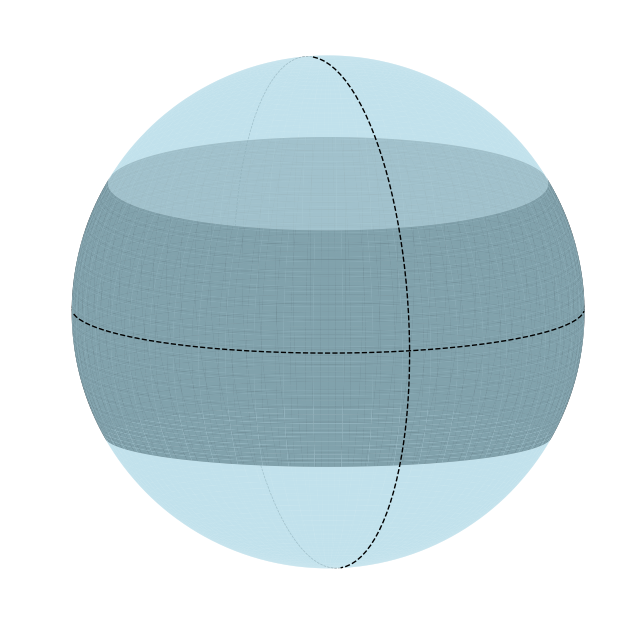

<Figure size 640x480 with 0 Axes>

In [113]:
#
elevation = elevation__
azimuth = azimuth__
alpha_sphere = 0.5
epsilon = 1.0

#
fig = Figure(dpi=200)
fig.set_figwidth(3)
fig.set_figheight(3)
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
fig.patch.set_alpha(0.0)
ax = fig.add_subplot(111, projection='3d')
ax.patch.set_alpha(0.0)
plt.tight_layout()

#
ax.set_axis_off()
coefs = (1., 1., epsilon)              # Coefficients in (x/a)**2 + (y/b)**2 + (z/c)**2 = 1 
rx, ry, rz = coefs                     # Radii corresponding to the coefficients

# Set of all spherical angles:
v = np.linspace(-np.pi, np.pi, 100)
u = np.linspace(-np.pi/2, np.pi/2, 100)

# Cartesian coordinates that correspond to the spherical angles
x = rx * np.outer(np.cos(u), np.cos(v))
y = ry * np.outer(np.cos(u), np.sin(v))
z = rz * np.outer(np.sin(u), np.ones_like(v))

# Landscape
ZSPHERE = z

# this is used to set the graph color to blue
blue = np.array([1, 1, 1])
rgb = np.tile(blue, (ZSPHERE.shape[0], ZSPHERE.shape[1], 1))

ls = LightSource(azdeg=azimuth, altdeg=elevation, hsv_min_val=0, hsv_max_val=1, hsv_min_sat=1, hsv_max_sat=0)
illuminated_surface = ls.shade_rgb(rgb, ZSPHERE)

#cmap = plt.cm.copper; ve=1
#cmap = plt.cm.gist_earth; ve=0.05
#rgb = ls.shade(ZSPHERE, cmap=cmap, vert_exag=ve, blend_mode='hsv')
#illuminated_surface = ls.shade_rgb(rgb, ZSPHERE)

# Plot:
ax.plot_surface(x, y, z,  rstride=1, cstride=1,
                color='lightblue', 
                linewidth=0, facecolors=illuminated_surface,
                alpha=alpha_sphere, antialiased=True,  zorder=z_order_sphere)


# #007fa2

# add one meridian
N = 100
θ = 0*np.ones(N)
φ = np.linspace(0, 2*np.pi, N)
x, y, z = coord3d(θ, φ, epsilon)
plot3d(ax, x, y, z, elevation, azimuth, color="black", \
        linewidth=0.5, linestyle="dashed", zorder=z_order_axes)

# add equator
N = 100
θ = np.linspace(0, 2*np.pi, N)
φ = 0*np.ones(N)
x, y, z = coord3d(θ, φ, epsilon)
plot3d(ax, x, y, z, elevation, azimuth, color="black", \
        linewidth=0.5, linestyle="dashed", zorder=z_order_axes)

# # Adjustment of the axes, so that they all have the same span:
max_radius = max(rx, ry, rz)
for axis in 'xyz':
        getattr(ax, 'set_{}lim'.format(axis))((-max_radius, max_radius))

ax.view_init(elev=elevation, azim=azimuth) # Reproduce view
# #ax.dist = dist__
ax.set_box_aspect(None, zoom=dist__)

ax.set_xlim(np.array([-rx,rx])*.67)
ax.set_ylim(np.array([-ry,ry])*.67)
ax.set_zlim(np.array([-rz,rz])*.67)

# 
ax.set_aspect('equal', 'box')   

r1 = np.pi/2.0-np.pi/6.0
r2 = np.pi/2.0+np.pi/6.0
color = "black"
alpha = 0.5
fig = plot_3d_domain(fig, r1, r2, elevation=elevation, azimuth=azimuth, color=color, alpha=alpha)

fig

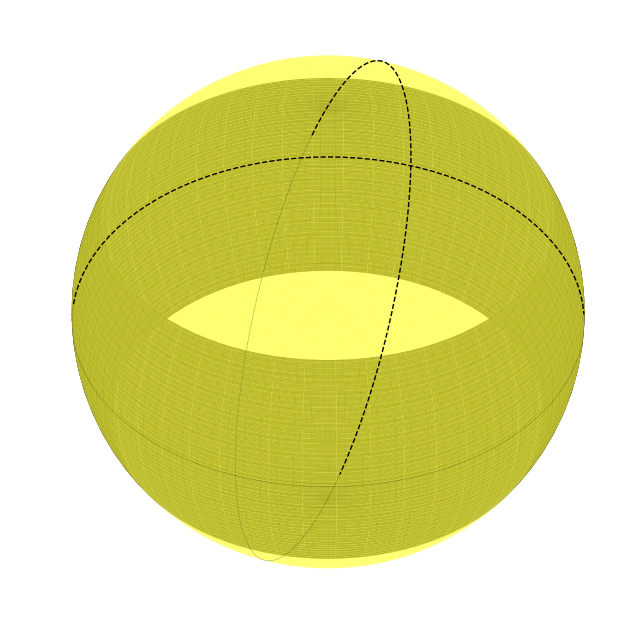

In [4]:
ax.view_init(elev=40, azim=azimuth) # Reproduce view

fig